##### Project Scribble
Project: Porfolio Optimization

#### Completed
- Implemented Pearson's Corelation Coefficient function
- Created dataset with all features (x values) raised to their coefficient value
- Implemented multiple linear regression
- Split data into training and testing sets
- Train model
- Evaluate model

#### What's Next
- Make predictions for **actual** future stock by converting date input to the values needed
- Clean up code so that it works for other stock datasets

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This line is for displaying our graphs in Jupyter
%matplotlib inline
sns.set()

import datetime

import math

### Functions
- Pearson's Corelation Coefficient
- Multiple Linear Regression
- Mean Squared Error
- Outlier Remover function (not implemented, thinking about it)

In [2]:
# Pearson's Corelation Coefficient function

# Input:
## dataframe: The dataframe where the data is stored
## x_column: The name of the x column we want to measure
## y_column: The name of the y column we want to measure

# Output:
## r = the Pearson's Corelation Coefficient

def PCC(dataframe: pd, features: list, target: str):
    r_values = []
    
    y_values = dataframe[target].to_numpy()
    y_mean = y_values.mean()
    
    for column in features:
        x_values = dataframe[column].to_numpy()
        x_mean = x_values.mean()
        numerator = sum((x_values - x_mean) * (y_values- y_mean))
        denominator = np.sqrt(sum((x_values - x_mean)**2) * sum((y_values - y_mean)**2))
        
        r = numerator / denominator
        r_values.append(r)
    
    return r_values
    

In [3]:
def kernelize(df: pd, features: list, value):
    dataframe = df.copy()
    if type(value) is list:
        for i in range(len(features)):
            dataframe[features[i]] = dataframe[features[i]] ** value[i]
    
    else:
        for column in features:
            dataframe[column] = dataframe[column] ** value
    
    return dataframe

In [4]:
def MSE(y_pred_values, y_values, data_length):
    
    sum_error = sum((y_pred_values - y_values) ** 2)
    
    cost = (1 / data_length) * sum_error
    
    return cost

In [5]:
# Multiple Linear Regression function

# Inputs:
## dataframe: The dataframe where the data is stored
## x_column: The name of the x column we want to measure
## y_column: The name of the y column we want to measure
## weight: The slope you want to start calculating the gradient descent with (default weight = 0)
## bias: The y-intercept you want to start calculating the gradient descent with (default bias = 0)
## rate: The rate you want the gradien descent to adjust by (default rate = 0.0001)
## epochs: How many times do we adjusy the gradient descent (default epochs = 1000)

# Outputs:
# A tuple that includes the new weight and new bias (slope and y-intercept)

def LinearRegression(dataframe: pd, 
                     features: list,
                     target: str,
                     rate = 0.00001,
                     epochs = 1000
                    ):
    
    # x_values contains the values of the entire column of "x_column"
    # y_values contains the values of the entire column of "y_column"
    x_values = dataframe[features]
    y_values = dataframe[target]
    
    
    # Just getting the full length of the dataframe
    total_rows = len(dataframe)
    total_columns = len(features)
    
    # Setting up weight and bias
    weights = np.zeros(total_columns)
    bias = 0
    
    # MSE array that will keep the last cost error (just one value)
    mse_array = []
    
    
    # Gradient descent portion
    for i in range(epochs):
        # pred_y_values is a new column, where the m'x+b' formula has been applied
        # Every row in pred_y_values has the formula applied
        pred_y_values = np.dot(x_values, weights) + bias
        
        # Obtaining the partial derivatives of the weight and bias
        der_weight = (1 / total_rows) * (2 * np.dot(x_values.T, (pred_y_values - y_values)))
        der_bias = (1 / total_rows) * (2 * np.sum(pred_y_values - y_values))
        
        # Calculating the new_weight and new bias
        new_weights = weights - rate * der_weight
        new_bias = bias - rate * der_bias
        
        # Helps prevent infinite values by stopping if MSE increased
        if mse_array == []:
            mse_array.append(MSE(pred_y_values, y_values, total_rows))
        else:
            mse = MSE(pred_y_values, y_values, total_rows)
            if mse > mse_array[0]:
                return (weights, bias)
            else:
                mse_array[0] = mse
                weights = new_weights
                bias = new_bias
        
    return (weights, bias)

In [6]:
def predict(df: pd, features: list, weights: list, bias: int):
    dataframe = df.copy()
    x_values = dataframe[features].to_numpy()
    dataframe["Prediction"] = np.dot(x_values, weights) + bias
    return dataframe


In [7]:
def daySplitter(df: pd, date_column: str):
    dataframe = df.copy()
    dataframe['Month'] = [d.month for d in dataframe[date_column]]
    dataframe['Week'] = [((d.day - 1) // 7 + 1) for d in dataframe[date_column]]
    dataframe["Weekday"] = [d.weekday() for d in dataframe[date_column]]
    dataframe['Year'] = [d.year for d in dataframe[date_column]]
    return dataframe

____
### Inspect and explore data

In [8]:
# Creating a dataframe with AMC stock data
amc_df = pd.read_csv("stock data/AMC.csv")

# Taking a peak at the first 5 rows of our table
amc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-16,2.35,2.49,2.15,2.44,2.44,6290800
1,2020-04-17,3.85,3.85,3.05,3.20,3.20,26799900
2,2020-04-20,3.22,3.44,3.06,3.18,3.18,10787200
3,2020-04-21,3.20,3.38,3.15,3.25,3.25,5788400
4,2020-04-22,3.39,3.39,3.16,3.18,3.18,4568600


In [9]:
# Checking if the Date column is a "datetime" object 
amc_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
amc_df.shape

(252, 7)

In [11]:
# It is not, so we convert it to one
amc_df['Date'] = pd.to_datetime(amc_df['Date'])
amc_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

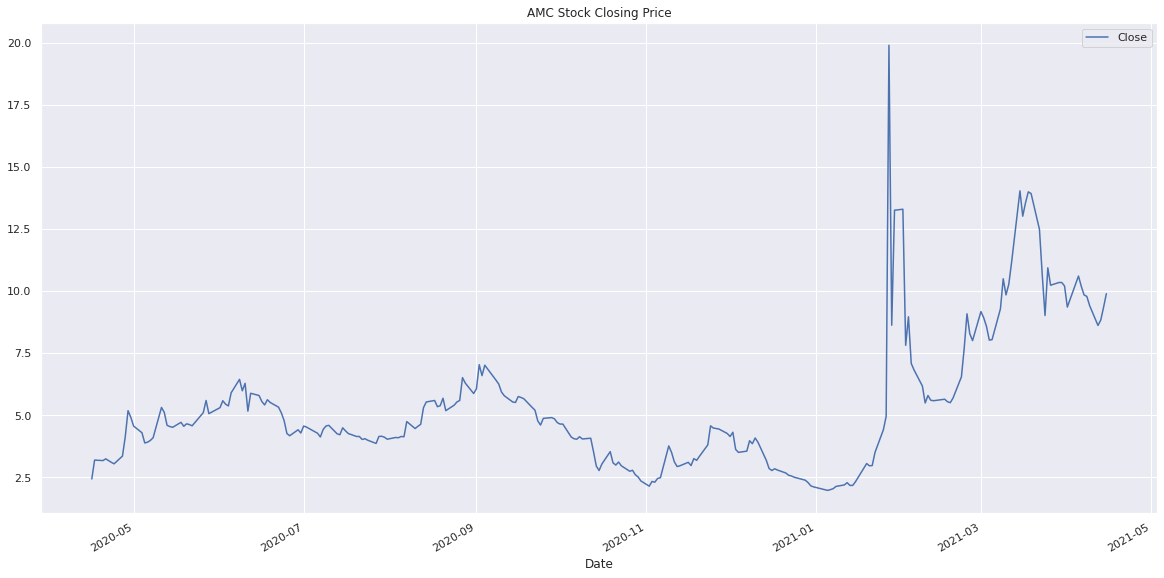

In [12]:
# Plotting Closing Price
amc_df.plot(x="Date",
            y="Close",
            figsize=(20,10),
            title = "AMC Stock Closing Price"
           )
plt.show()

_______
### Method 1
- Using Open, High, Low, and Volume as features
- (NOT USEFUL FOR PREDICTING FUTURE STOCKS)

In [13]:
modified_df = amc_df.copy()

In [14]:
# Last 50 days
modified_df = modified_df[-50:]

In [15]:
# Declaring our features and target
features = ["Open", "High", "Low", "Volume"]
target = "Close" # Y value

In [16]:
r_values = PCC(modified_df, features, target)
print(f"R-value per feature BEFORE kernelazation: {r_values}")

R-value per feature BEFORE kernelazation: [0.9367580507345894, 0.9685816202086893, 0.9751631168385833, 0.04429040162942075]


In [17]:
# Kernelizing features with values above
modified_df = kernelize(modified_df, features, r_values)

In [18]:
r_values = PCC(modified_df, features, target)
print(f"R-value per feature AFTER kernelization: {r_values}")

R-value per feature AFTER kernelization: [0.9368012990304271, 0.9683697028768641, 0.9751945305108203, 0.06911980952593078]


In [19]:
modified_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
202,2021-02-03,7.710042,9.094811,7.495427,8.97,8.97,2.342134
203,2021-02-04,7.587561,8.164520,6.669733,7.09,7.09,2.310571
204,2021-02-05,6.330157,7.738895,6.223350,6.83,6.83,2.329139
205,2021-02-08,6.090006,6.484608,5.505542,6.18,6.18,2.286111
206,2021-02-09,5.198142,5.497522,5.047528,5.50,5.50,2.263678


In [20]:
# Using last 10 for testing
train = modified_df[:-10]
test = modified_df[-10:]

In [21]:
weights, bias = LinearRegression(train, features, target)

In [22]:
## Printing stuff
print(f"List of features: {features}")
print(f"Target: {target}")
print()
print(f"y = {weights[0]} x + {weights[1]} x + {weights[2]} x + {weights[3]} x + {bias}")

List of features: ['Open', 'High', 'Low', 'Volume']
Target: Close

y = 0.32955799702806543 x + 0.3796469704592817 x + 0.33855416015717626 x + 0.08754739499017732 x + 0.03855921528201301


In [23]:
test = predict(test, features, weights, bias)

In [24]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
242,2021-04-01,8.830985,9.536275,8.660489,9.36,9.36,2.235702,9.697073
243,2021-04-05,8.725818,10.426223,9.186196,10.61,10.61,2.257119,10.180136
244,2021-04-06,8.968383,9.752258,9.444155,10.20,10.20,2.180524,10.084834
245,2021-04-07,8.701536,9.464245,9.305985,9.85,9.85,2.139845,9.837210
246,2021-04-08,8.652960,9.311123,8.983385,9.79,9.79,2.153946,9.655085


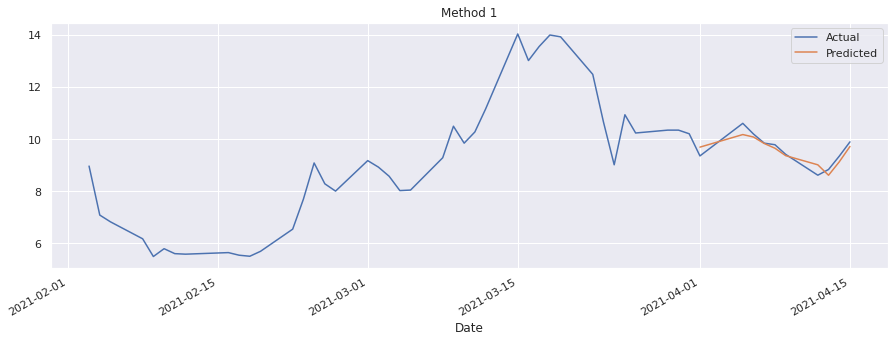

In [25]:
ax = modified_df.plot(title="Method 1", x="Date", y="Close",figsize=(15,5))
test.plot(ax=ax, x="Date", y="Prediction")

plt.legend(labels=['Actual', 'Predicted'])

### Problem
- Cannot predict values for the future, since I need future "Open", "Low", "High", and "Volume" values to predict future "Close" value

___
### Method 2:
- Predict values until the end of the month

In [26]:
modified_df = amc_df.copy()

In [27]:
# Last 50 days
modified_df = modified_df[-50:]

In [28]:
modified_df = daySplitter(modified_df, "Date")

In [29]:
new_order = ["Date", "Month", "Week", "Weekday", "Year", "Open", "High", "Low", "Close"]
modified_df = modified_df[new_order]

In [30]:
modified_df.head()

,Date,Month,Week,Weekday,Year,Open,High,Low,Close
202,2021-02-03,2,1,2,2021,8.85,9.77,7.89,8.97
203,2021-02-04,2,1,3,2021,8.70,8.74,7.00,7.09
204,2021-02-05,2,1,4,2021,7.17,8.27,6.52,6.83
205,2021-02-08,2,2,0,2021,6.88,6.89,5.75,6.18
206,2021-02-09,2,2,1,2021,5.81,5.81,5.26,5.50


In [31]:
# Do group by
features = ["Open", "High", "Low"]
gb = modified_df.groupby('Month')[features].mean()

# Convert it to a DataFrame
month_df = pd.DataFrame(gb)

# Reset the index
month_df = month_df.reset_index()

# Rename columns
month_df = month_df.rename(columns={"Open": "Open M_AVG", "High": "High M_AVG", "Low": "Low M_AVG",})

# Check it out
month_df

,Month,Open M_AVG,High M_AVG,Low M_AVG
0,2,6.862353,7.409412,6.168824
1,3,10.749130,11.359130,10.060870
2,4,9.739000,10.059000,9.276000


In [32]:
# Do group by
features = ["Open", "High", "Low"]
gb = modified_df.groupby('Week')[features].mean()

# Convert it to a DataFrame
week_df = pd.DataFrame(gb)

# Reset the index
week_df = week_df.reset_index()

# Rename columns
week_df = week_df.rename(columns={"Open": "Open WK_AVG", "High": "High WK_AVG", "Low": "Low WK_AVG",})

# Check it out
week_df

,Week,Open WK_AVG,High WK_AVG,Low WK_AVG
0,1,9.066667,9.485000,8.390833
1,2,8.412667,8.951333,7.919333
2,3,10.039000,10.441000,9.540000
3,4,9.487000,10.356000,8.425000
4,5,10.343333,10.583333,9.966667


In [33]:
# Do group by
features = ["Open", "High", "Low"]
gb = modified_df.groupby('Weekday')[features].mean()

# Convert it to a DataFrame
weekday_df = pd.DataFrame(gb)

# Reset the index
weekday_df = weekday_df.reset_index()

# Rename columns
weekday_df = weekday_df.rename(columns={"Open": "Open WD_AVG", "High": "High WD_AVG", "Low": "Low WD_AVG",})

# Check it out
weekday_df

,Weekday,Open WD_AVG,High WD_AVG,Low WD_AVG
0,0,9.487778,10.186667,8.906667
1,1,9.178000,9.558000,8.527000
2,2,9.170000,9.886364,8.580909
3,3,9.397273,9.787273,8.539091
4,4,8.874444,9.348889,8.364444


In [34]:
modified_df = modified_df.merge(weekday_df, on="Weekday")
modified_df = modified_df.merge(week_df, on="Week")
modified_df = modified_df.merge(month_df, on="Month")


In [35]:
modified_df = modified_df.drop(columns = ["Open", "High", "Low"])

In [36]:
modified_df = modified_df.sort_values(by='Date') 

In [37]:
modified_df.head()

,Date,Month,Week,Weekday,Year,Close,Open WD_AVG,High WD_AVG,Low WD_AVG,Open WK_AVG,High WK_AVG,Low WK_AVG,Open M_AVG,High M_AVG,Low M_AVG
0,2021-02-03,2,1,2,2021,8.97,9.170000,9.886364,8.580909,9.066667,9.485000,8.390833,6.862353,7.409412,6.168824
1,2021-02-04,2,1,3,2021,7.09,9.397273,9.787273,8.539091,9.066667,9.485000,8.390833,6.862353,7.409412,6.168824
2,2021-02-05,2,1,4,2021,6.83,8.874444,9.348889,8.364444,9.066667,9.485000,8.390833,6.862353,7.409412,6.168824
6,2021-02-08,2,2,0,2021,6.18,9.487778,10.186667,8.906667,8.412667,8.951333,7.919333,6.862353,7.409412,6.168824
7,2021-02-09,2,2,1,2021,5.50,9.178000,9.558000,8.527000,8.412667,8.951333,7.919333,6.862353,7.409412,6.168824


In [38]:
target = "Close" # Y value

features = list(modified_df.columns)
features = features[6:]
features

['Open WD_AVG',
 'High WD_AVG',
 'Low WD_AVG',
 'Open WK_AVG',
 'High WK_AVG',
 'Low WK_AVG',
 'Open M_AVG',
 'High M_AVG',
 'Low M_AVG']

In [39]:
r_values = PCC(modified_df, features, target)
print(f"R-value per feature BEFORE kernelazation: {r_values}")

R-value per feature BEFORE kernelazation: [0.09341679381949562, 0.10630050091628959, 0.12404977810521732, 0.287439805584709, 0.27195918637269606, 0.2820893744326055, 0.7728641465617963, 0.7722292473519797, 0.7711608272161777]


In [40]:
# Kernelizing features with values above
modified_df = kernelize(modified_df, features, 2)

In [41]:
r_values = PCC(modified_df, features, target)
print(f"R-value per feature AFTER kernelazation: {r_values}")

R-value per feature AFTER kernelazation: [0.093641273240959, 0.10689118783654078, 0.12411816488431934, 0.2885819546360106, 0.2726450111191026, 0.2808867228651456, 0.7728269289591068, 0.770124212150451, 0.7725126569063533]


In [42]:
# Using last 10 for testing
train = modified_df[:-10]
test = modified_df[-10:]

In [43]:
weights, bias = LinearRegression(train, features, target, rate = 0.0000001)

In [44]:
test = predict(test, features, weights, bias)

In [45]:
test.head()

,Date,Month,Week,Weekday,Year,Close,Open WD_AVG,High WD_AVG,Low WD_AVG,Open WK_AVG,High WK_AVG,Low WK_AVG,Open M_AVG,High M_AVG,Low M_AVG,Prediction
41,2021-04-01,4,1,3,2021,9.36,88.308735,95.790707,72.916074,82.204444,89.965225,70.406084,94.848121,101.183481,86.044176,9.250165
42,2021-04-05,4,1,0,2021,10.61,90.017927,103.768178,79.328711,82.204444,89.965225,70.406084,94.848121,101.183481,86.044176,9.408188
43,2021-04-06,4,1,1,2021,10.20,84.235684,91.355364,72.709729,82.204444,89.965225,70.406084,94.848121,101.183481,86.044176,9.160318
40,2021-04-07,4,1,2,2021,9.85,84.088900,97.740186,73.632001,82.204444,89.965225,70.406084,94.848121,101.183481,86.044176,9.236439
45,2021-04-08,4,2,3,2021,9.79,88.308735,95.790707,72.916074,70.772960,80.126368,62.715840,94.848121,101.183481,86.044176,8.934661


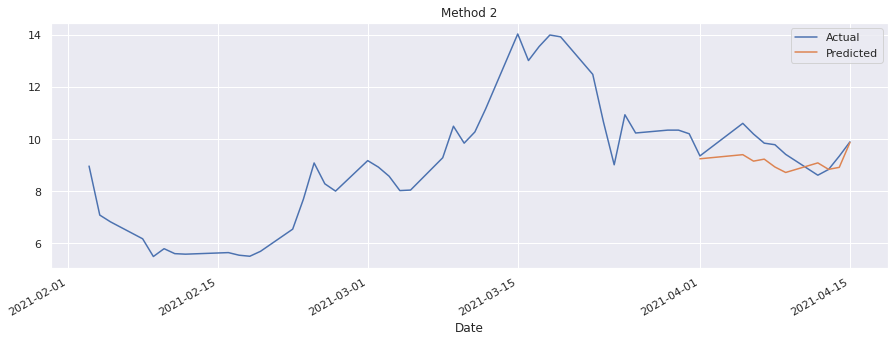

In [46]:
ax = modified_df.plot(title = "Method 2", x="Date", y="Close",figsize=(15,5))
test.plot(ax=ax, x="Date", y="Prediction")

plt.legend(labels=['Actual', 'Predicted'])

plt.show()

___
### Method 3:
- Predict values until the end of the year

In [47]:
modified_df = amc_df.copy()

In [48]:
modified_df = daySplitter(modified_df, "Date")

In [49]:
new_order = ["Date", "Month", "Week", "Weekday", "Year", "Open", "High", "Low", "Close"]
modified_df = modified_df[new_order]

In [50]:
modified_df.head()

,Date,Month,Week,Weekday,Year,Open,High,Low,Close
0,2020-04-16,4,3,3,2020,2.35,2.49,2.15,2.44
1,2020-04-17,4,3,4,2020,3.85,3.85,3.05,3.20
2,2020-04-20,4,3,0,2020,3.22,3.44,3.06,3.18
3,2020-04-21,4,3,1,2020,3.20,3.38,3.15,3.25
4,2020-04-22,4,4,2,2020,3.39,3.39,3.16,3.18


In [51]:
# Do group by
features = ["Open", "High", "Low"]
gb = modified_df.groupby('Month')[features].mean()

# Convert it to a DataFrame
month_df = pd.DataFrame(gb)

# Reset the index
month_df = month_df.reset_index()

# Rename columns
month_df = month_df.rename(columns={"Open": "Open M_AVG", "High": "High M_AVG", "Low": "Low M_AVG",})

# Check it out
month_df

,Month,Open M_AVG,High M_AVG,Low M_AVG
0,1,4.735263,5.208421,3.637895
1,2,7.533684,8.068947,6.514737
2,3,10.749130,11.359130,10.060870
3,4,6.490476,6.779048,6.140952
4,5,4.806000,4.960000,4.462500
5,6,5.400455,5.645000,5.102727
6,7,4.265909,4.383182,4.113636
7,8,5.135714,5.380952,4.888571
8,9,5.732857,5.903333,5.444286
9,10,3.470455,3.562273,3.298636


In [52]:
# Do group by
features = ["Open", "High", "Low"]
gb = modified_df.groupby('Week')[features].mean()

# Convert it to a DataFrame
week_df = pd.DataFrame(gb)

# Reset the index
week_df = week_df.reset_index()

# Rename columns
week_df = week_df.rename(columns={"Open": "Open WK_AVG", "High": "High WK_AVG", "Low": "Low WK_AVG",})

# Check it out
week_df

,Week,Open WK_AVG,High WK_AVG,Low WK_AVG
0,1,5.532321,5.791964,5.106250
1,2,5.478500,5.704833,5.093000
2,3,5.156207,5.347931,4.908276
3,4,5.564912,5.949123,4.930175
4,5,5.374762,5.627619,5.031905


In [53]:
# Do group by
features = ["Open", "High", "Low"]
gb = modified_df.groupby('Weekday')[features].mean()

# Convert it to a DataFrame
weekday_df = pd.DataFrame(gb)

# Reset the index
weekday_df = weekday_df.reset_index()

# Rename columns
weekday_df = weekday_df.rename(columns={"Open": "Open WD_AVG", "High": "High WD_AVG", "Low": "Low WD_AVG",})

# Check it out
weekday_df

,Weekday,Open WD_AVG,High WD_AVG,Low WD_AVG
0,0,5.508958,5.768333,5.060625
1,1,5.315577,5.527500,4.930000
2,2,5.599808,5.878654,5.115577
3,3,5.376731,5.680577,4.943269
4,4,5.333958,5.598125,5.011875


In [54]:
# Do group by
features = ["Open", "High", "Low"]
gb = modified_df.groupby('Year')[features].mean()

# Convert it to a DataFrame
year_df = pd.DataFrame(gb)

# Reset the index
year_df = year_df.reset_index()

# Rename columns
year_df = year_df.rename(columns={"Open": "Open Y_AVG", "High": "High Y_AVG", "Low": "Low Y_AVG",})

# Check it out
year_df

,Year,Open Y_AVG,High Y_AVG,Low Y_AVG
0,2020,4.364199,4.530276,4.120663
1,2021,8.137042,8.649577,7.282535


In [55]:
modified_df = modified_df.merge(year_df, on="Year")
modified_df = modified_df.merge(weekday_df, on="Weekday")
modified_df = modified_df.merge(week_df, on="Week")
modified_df = modified_df.merge(month_df, on="Month")


In [56]:
modified_df = modified_df.drop(columns = ["Open", "High", "Low"])

In [57]:
modified_df = modified_df.sort_values(by='Date') 

In [58]:
modified_df.head()

,Date,Month,Week,Weekday,Year,Close,Open Y_AVG,High Y_AVG,Low Y_AVG,Open WD_AVG,High WD_AVG,Low WD_AVG,Open WK_AVG,High WK_AVG,Low WK_AVG,Open M_AVG,High M_AVG,Low M_AVG
0,2020-04-16,4,3,3,2020,2.44,4.364199,4.530276,4.120663,5.376731,5.680577,4.943269,5.156207,5.347931,4.908276,6.490476,6.779048,6.140952
2,2020-04-17,4,3,4,2020,3.20,4.364199,4.530276,4.120663,5.333958,5.598125,5.011875,5.156207,5.347931,4.908276,6.490476,6.779048,6.140952
3,2020-04-20,4,3,0,2020,3.18,4.364199,4.530276,4.120663,5.508958,5.768333,5.060625,5.156207,5.347931,4.908276,6.490476,6.779048,6.140952
4,2020-04-21,4,3,1,2020,3.25,4.364199,4.530276,4.120663,5.315577,5.527500,4.930000,5.156207,5.347931,4.908276,6.490476,6.779048,6.140952
9,2020-04-22,4,4,2,2020,3.18,4.364199,4.530276,4.120663,5.599808,5.878654,5.115577,5.564912,5.949123,4.930175,6.490476,6.779048,6.140952


In [59]:
target = "Close" # Y value

features = list(modified_df.columns)
features = features[6:]
features

['Open Y_AVG',
 'High Y_AVG',
 'Low Y_AVG',
 'Open WD_AVG',
 'High WD_AVG',
 'Low WD_AVG',
 'Open WK_AVG',
 'High WK_AVG',
 'Low WK_AVG',
 'Open M_AVG',
 'High M_AVG',
 'Low M_AVG']

In [60]:
r_values = PCC(modified_df, features, target)
print(f"R-value per feature BEFORE kernelazation: {r_values}")

R-value per feature BEFORE kernelazation: [0.594047849688075, 0.5940478496880737, 0.5940478496880741, 0.04237603589008525, 0.03987816240257614, 0.04349416743966453, 0.0419226298768361, 0.042261691273625245, 0.016570569129919544, 0.7540849265231889, 0.7522982878013407, 0.7520593824276145]


In [61]:
# Kernelizing features with values above
modified_df = kernelize(modified_df, features, math.pi)

In [62]:
r_values = PCC(modified_df, features, target)
print(f"R-value per feature AFTER kernelazation: {r_values}")

R-value per feature AFTER kernelazation: [0.5940478496880742, 0.5940478496880748, 0.5940478496880747, 0.04249546910754248, 0.0401590041086387, 0.04359745930397733, 0.041940605283728595, 0.04206797399017781, 0.01646063048743676, 0.7163598552124751, 0.7156785560163734, 0.7104097768576312]


In [63]:
# Using last 10 for testing
train = modified_df[:-10]
test = modified_df[-10:]

In [64]:
weights, bias = LinearRegression(train, features, target, rate = 0.000000005)

In [65]:
test = predict(test, features, weights, bias)

In [66]:
test.head()

,Date,Month,Week,Weekday,Year,Close,Open Y_AVG,High Y_AVG,Low Y_AVG,Open WD_AVG,High WD_AVG,Low WD_AVG,Open WK_AVG,High WK_AVG,Low WK_AVG,Open M_AVG,High M_AVG,Low M_AVG,Prediction
12,2021-04-01,4,1,3,2021,9.36,724.961747,878.32708,511.611926,197.238138,234.419515,151.464242,215.730945,249.165647,167.713597,356.32154,408.501291,299.443974,6.348638
13,2021-04-05,4,1,0,2021,10.61,724.961747,878.32708,511.611926,212.881763,245.985884,163.050677,215.730945,249.165647,167.713597,356.32154,408.501291,299.443974,6.436752
14,2021-04-06,4,1,1,2021,10.20,724.961747,878.32708,511.611926,190.275920,215.140845,150.190614,215.730945,249.165647,167.713597,356.32154,408.501291,299.443974,6.278469
15,2021-04-07,4,1,2,2021,9.85,724.961747,878.32708,511.611926,224.106862,261.070480,168.677878,215.730945,249.165647,167.713597,356.32154,408.501291,299.443974,6.513360
16,2021-04-08,4,2,3,2021,9.79,724.961747,878.32708,511.611926,197.238138,234.419515,151.464242,209.205965,237.578607,166.350192,356.32154,408.501291,299.443974,6.300097


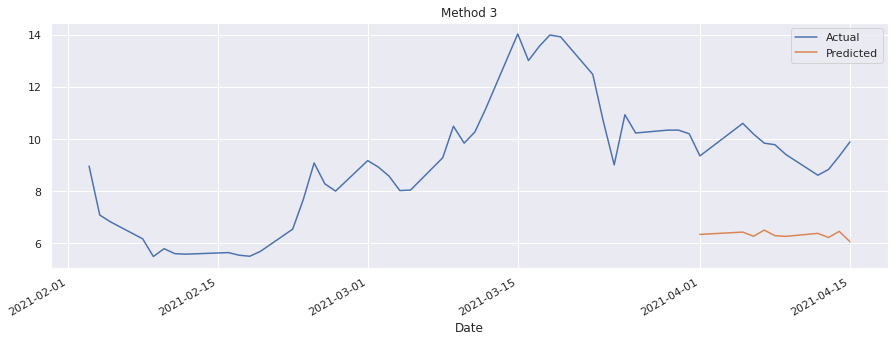

In [67]:
modified_df = modified_df[-50:]
ax = modified_df.plot(title = "Method 3", x="Date", y="Close",figsize=(15,5))
test.plot(ax=ax, x="Date", y="Prediction")

plt.legend(labels=['Actual', 'Predicted'])

plt.show()